In [165]:
# Load data
import pandas as pd

FILE_PATH ="./wine.data"

column_names = [
    "class id",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]

df = pd.read_csv(FILE_PATH, names=column_names)

print(df.head())

   class id  Alcohol  Malic acid  ...   Hue  OD280/OD315 of diluted wines  Proline
0         1    14.23        1.71  ...  1.04                          3.92     1065
1         1    13.20        1.78  ...  1.05                          3.40     1050
2         1    13.16        2.36  ...  1.03                          3.17     1185
3         1    14.37        1.95  ...  0.86                          3.45     1480
4         1    13.24        2.59  ...  1.04                          2.93      735

[5 rows x 14 columns]


In [166]:
%matplotlib inline

In [167]:
df[["class id", "Alcohol"]]

,class id,Alcohol
0,1,14.23
1,1,13.20
2,1,13.16
3,1,14.37
4,1,13.24
...,...,...
173,3,13.71
174,3,13.40
175,3,13.27
176,3,13.17


'\nfor i in range(1, 4):\n   ax.bar(column_names[1:], df[df["class id"] == i][column_names[1:]].mean(), width=0.5, capsize=1.5)\n'

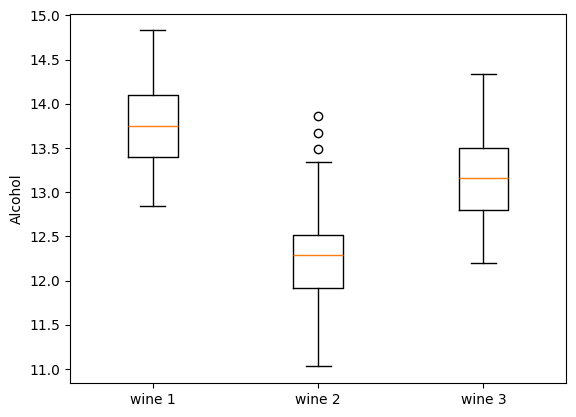

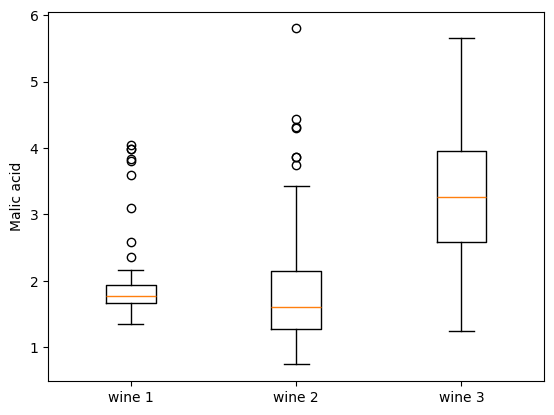

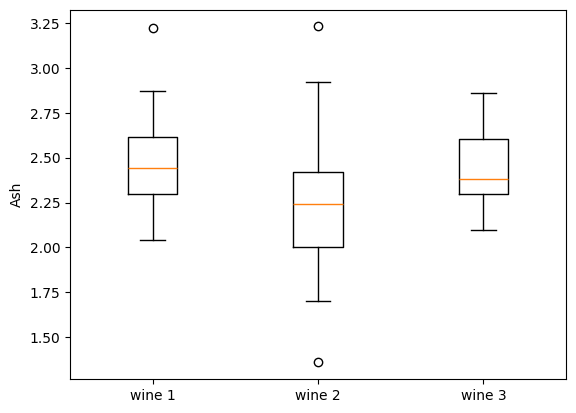

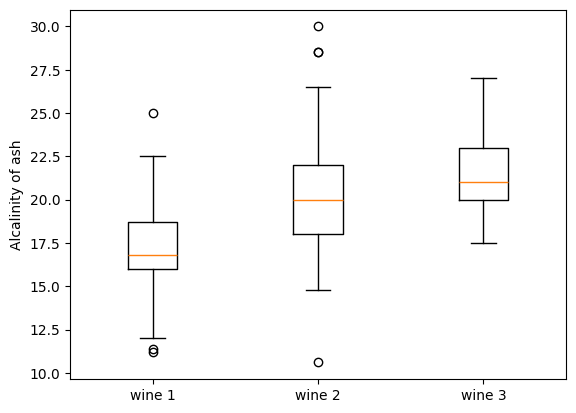

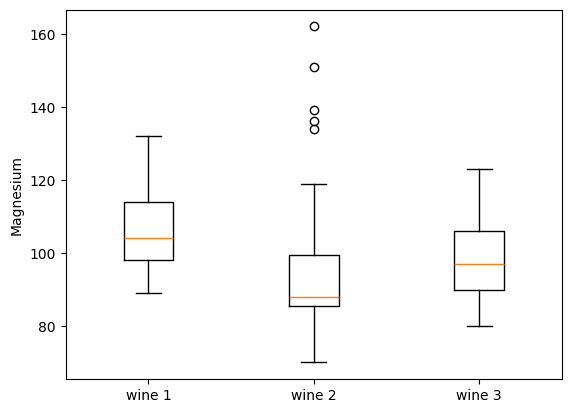

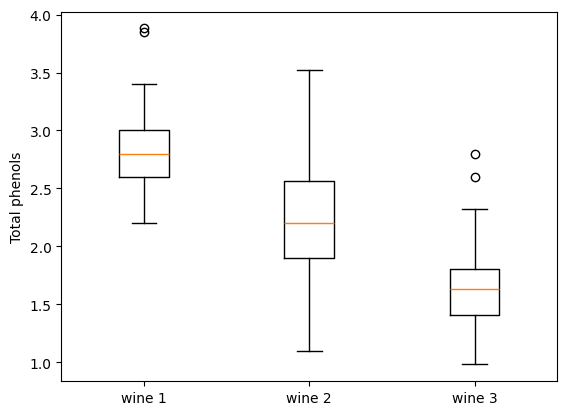

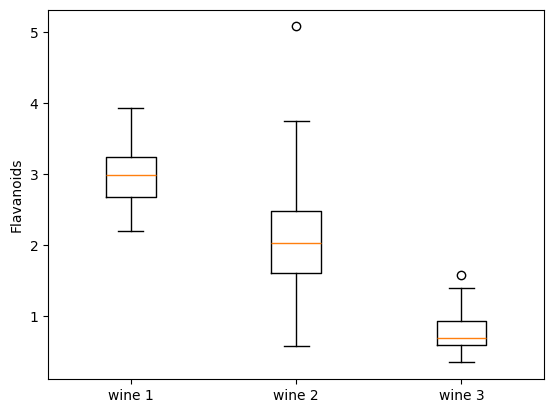

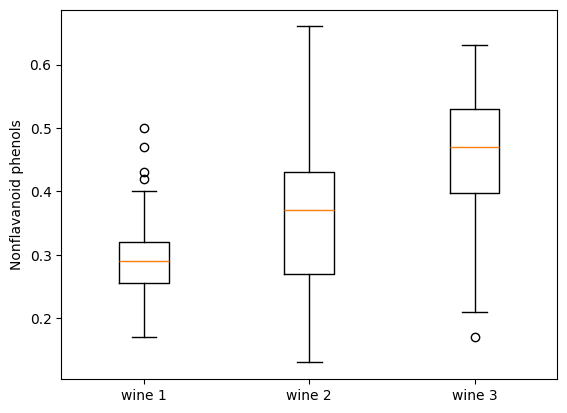

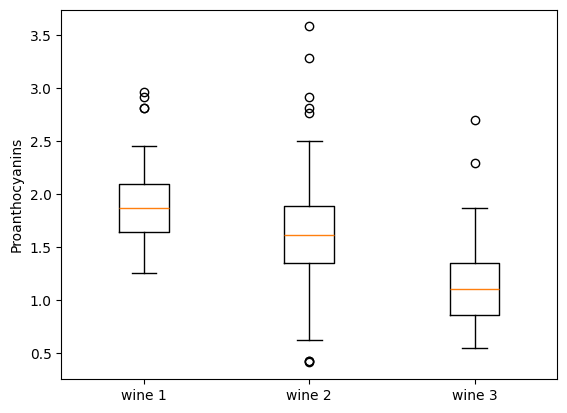

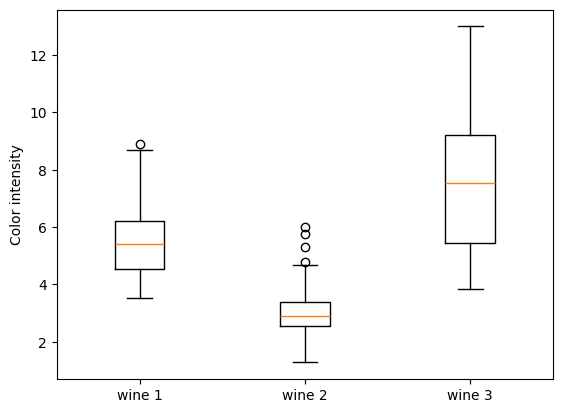

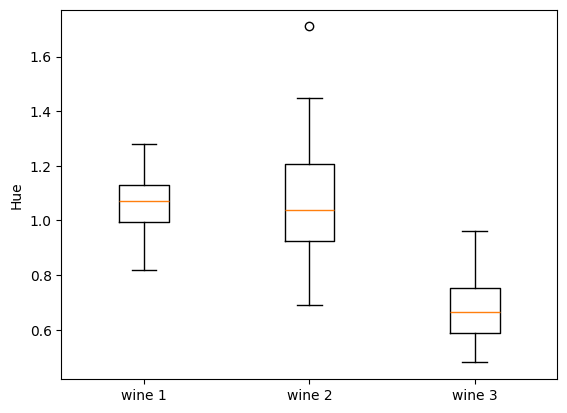

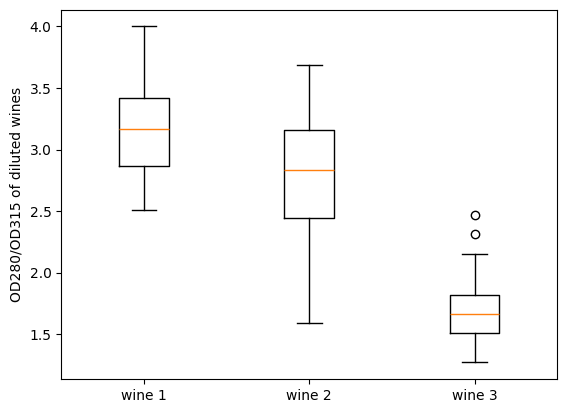

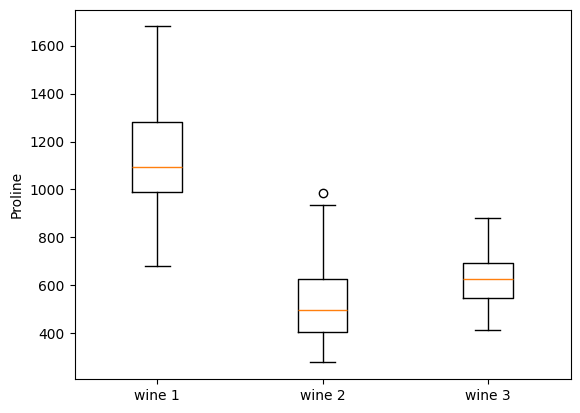

In [168]:
# compare statistics of each class of wine to see which attributes will
# be useful when trying to build a classifier
from matplotlib import pyplot as plt



features_to_examine = column_names[1:]
class_labels = ["wine 1", "wine 2", "wine 3"]
pltindx = [0, 0]

for feature_name in features_to_examine:
   fig, ax = plt.subplots()
   
   ax.set_ylabel(feature_name)
   ax.boxplot(
        [
            df[df["class id"] == 1][feature_name],
            df[df["class id"] == 2][feature_name],
            df[df["class id"] == 3][feature_name],
        ],
        tick_labels=class_labels,
    )
   if pltindx[1] == 2:
      pltindx[0] += 1
      pltindx[1] = 0
   else:
      pltindx[1] += 1

"""
for i in range(1, 4):
   ax.bar(column_names[1:], df[df["class id"] == i][column_names[1:]].mean(), width=0.5, capsize=1.5)
"""

In [169]:
# given the above figures a feature that is has a fairly different distribution across the different 
# wine classes is "Proline"

# we split our dataset into a 80% training and 20% testing


import numpy as np
proline_dataset = df[["Proline", "class id"]].to_numpy()
np.random.shuffle(proline_dataset)

TRAINING_PERCENTAGE = 0.8

training_proline_dataset = proline_dataset[:int(len(proline_dataset)*TRAINING_PERCENTAGE)]
testing_proline_dataset = proline_dataset[int(len(proline_dataset)*TRAINING_PERCENTAGE):]



In [170]:
# given the above figures a feature that is has a fairly different distribution across the different 
# wine classes is "Proline"

# we can see how a clasificator works with one of them

from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(random_state=0).fit(
    training_proline_dataset[:, 0].reshape(-1, 1), training_proline_dataset[:, 1].reshape(-1, 1)
)


/home/morthem/Playground/Bloque/challenge2/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


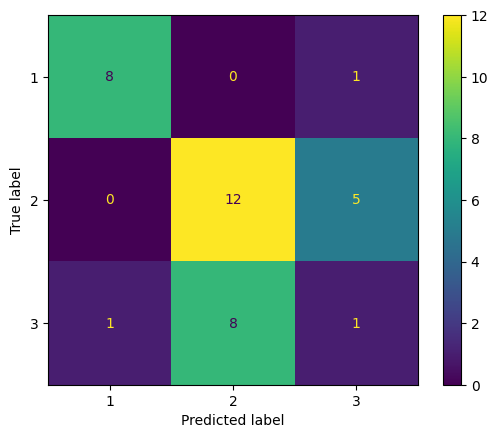

In [171]:
# we will now graph the confusion matrix to see 
# how does our model perform classfying the different categories of wines based on the 
# feature called "Proline"

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = regressor.predict(testing_proline_dataset[:, 0].reshape(-1, 1))
test_ground_truth = testing_proline_dataset[:, 1]

cm = confusion_matrix(test_ground_truth, test_predictions, labels=regressor.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=regressor.classes_)
disp.plot()



In [172]:
# we can evaluate the concrete accuracy score

from sklearn.metrics import accuracy_score

score = accuracy_score(y_true=test_ground_truth, y_pred=test_predictions)
print(f"{score*100}%")

58.333333333333336%


In [173]:
# from the above confussion matrix we can observe that the model is very accurate when predicting 
# when a wine is of type 1, this can be attributed to the fact that it has "Proline" levels far above 
# the levels of the wines of type 2 and 3. We can observe that the prediction of wether a wine is of type
# 2 is also fairly accurate. The most unnacurate prediction with a accuracy rate below 20% is that of wine 3.
# this can be attributed to the fact that the distributions of "Proline" levels of wines of type 1 and 2 are very similar
# the model has a bias for classifying wines in that overlapped range as wines of Type 2, thus creating 
# the 8 false positives for wine 2 that we are able to see in the botton row of the confussion matrix.

# A solution to this problem would be to include a feature into the training in which wine 2 and 3 have drastically 
# different distributions, for example: "Color Intensity"

In [174]:
# The "Proline" feature was meaningful but performing classification based on a feature for which 
# all 3 types of wines have similar types of distributions does not yeild the same effect, we can observe this with
# the effects of using a feature like "Ash"

ash_dataset = df[["Ash", "class id"]].to_numpy()
np.random.shuffle(ash_dataset)

TRAINING_PERCENTAGE = 0.8

training_ash_dataset =  ash_dataset[:int(len(ash_dataset)*TRAINING_PERCENTAGE)]
testing_ash_dataset = ash_dataset[int(len(ash_dataset)*TRAINING_PERCENTAGE):]


ash_regressor = LogisticRegression(random_state=0).fit(
    training_ash_dataset[:, 0].reshape(-1, 1), training_ash_dataset[:, 1].reshape(-1, 1)
)


/home/morthem/Playground/Bloque/challenge2/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


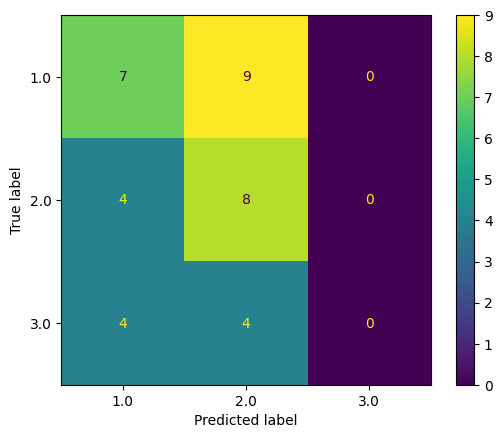

In [175]:
# check confussion matrix

test_predictions = ash_regressor.predict(testing_ash_dataset[:, 0].reshape(-1, 1))
test_ground_truth = testing_ash_dataset[:, 1]

cm = confusion_matrix(test_ground_truth, test_predictions, labels=ash_regressor.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=ash_regressor.classes_)
disp.plot()



In [176]:
score = accuracy_score(y_true=test_ground_truth, y_pred=test_predictions)
print(f"{score*100}%")

41.66666666666667%


In [177]:
# as expected the accuracy is not that good, we can see that the model has taken 
# a bias for calssifying wines as type 2. Although the accuracy is not that good it is still better
# than randomly guessing (33%) 

In [178]:
two_variables_dataset = df[["Ash", "Proline", "class id"]].to_numpy()
np.random.shuffle(two_variables_dataset)

TRAINING_PERCENTAGE = 0.8

training_dataset = two_variables_dataset[:int(len(two_variables_dataset)*TRAINING_PERCENTAGE)]
testing_dataset = two_variables_dataset[int(len(two_variables_dataset)*TRAINING_PERCENTAGE):]


tv_regressor = LogisticRegression(random_state=0, max_iter=300).fit(
    training_dataset[:, :-1], training_dataset[:, -1].reshape(-1, 1)
)


/home/morthem/Playground/Bloque/challenge2/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


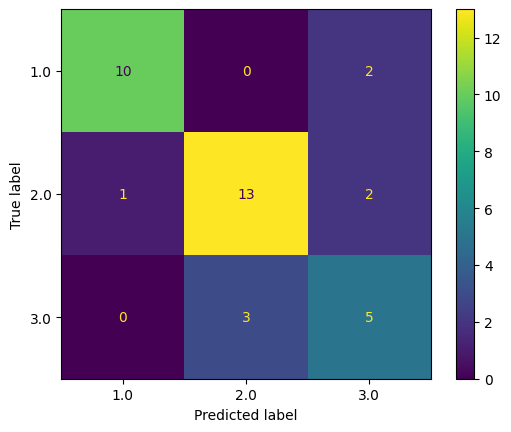

In [179]:
# check confussion matrix

test_predictions = tv_regressor.predict(testing_dataset[:, :-1])
test_ground_truth = testing_dataset[:, -1]

cm = confusion_matrix(test_ground_truth, test_predictions, labels=ash_regressor.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=ash_regressor.classes_)
disp.plot()



In [180]:
# as expected, the yielded results were better than the results given by the two models 
# separetly

score = accuracy_score(y_true=test_ground_truth, y_pred=test_predictions)
print(f"{score*100}%")

77.77777777777779%


In [181]:
# we can add additional features like each feature squared to our dataset in search of better results

squared_ash = two_variables_dataset[:, 0] ** 2
squared_proline = two_variables_dataset[:, 1] ** 2


In [182]:
four_var_dataset = np.concatenate((squared_ash.reshape(-1,1), 
                squared_proline.reshape(-1, 1), 
                two_variables_dataset, 
                ), axis=1)

In [183]:
TRAINING_PERCENTAGE = 0.8

np.random.shuffle(four_var_dataset)
training_dataset = four_var_dataset[:int(len(four_var_dataset)*TRAINING_PERCENTAGE)]
testing_dataset = four_var_dataset[int(len(four_var_dataset)*TRAINING_PERCENTAGE):]

# as we add more variables the regressor needs more iterations to converge
fv_regressor = LogisticRegression(random_state=0, max_iter=9500).fit(
    training_dataset[:, :-1], training_dataset[:, -1].reshape(-1, 1)
)

/home/morthem/Playground/Bloque/challenge2/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


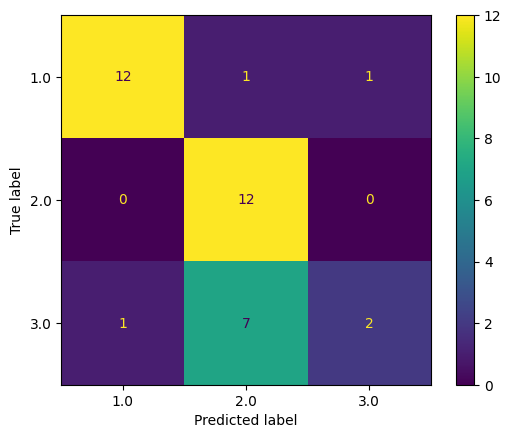

In [184]:

test_predictions = fv_regressor.predict(testing_dataset[:, :-1])
test_ground_truth = testing_dataset[:, -1]

cm = confusion_matrix(test_ground_truth, test_predictions, labels=ash_regressor.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=ash_regressor.classes_)
disp.plot()


In [185]:
score = accuracy_score(y_true=test_ground_truth, y_pred=test_predictions)
print(f"{score*100}%")

72.22222222222221%


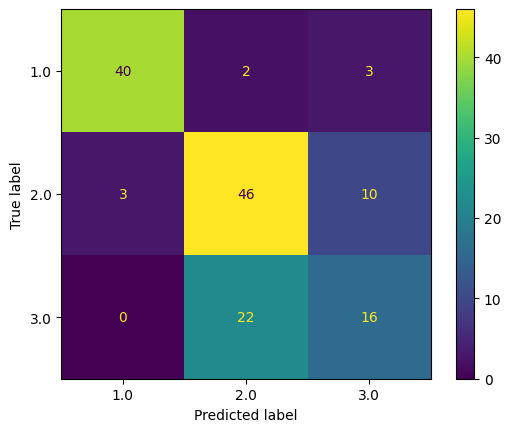

In [ ]:
# as we can see the obtained results are still good yet no great dividents were yielded by squaring the features.
# The fact that the scores are not 
# absolutly perfect is ok taking into consideration that the only false positive shown in the confussion 
# matrix might be due to wines lying in between the blurry zone of wine 2 and wine 3 that we have mentioned before

# we can evaluate the results obtained during the training to see if the results getting through testing are
# similar


training_predictions = fv_regressor.predict(training_dataset[:, :-1])
training_ground_truth = training_dataset[:, -1]

cm = confusion_matrix(training_ground_truth, training_predictions, labels=ash_regressor.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=ash_regressor.classes_)
disp.plot()


In [187]:
score = accuracy_score(y_true=training_ground_truth, y_pred=training_predictions)
print(f"{score*100}%")

71.83098591549296%


In [188]:
# we can see that the results obtained differ a little bit, since most of the errors are probably due to points lying 
# in between wine 2 and wine 3 category causin false positives for each category, we can try to add a variable for which their distributions do differ to see if that 
# helps during the classification process, like color intensity

In [189]:
color_intensity = df["Color intensity"].to_numpy().reshape(-1, 1)
color_intensity_squared = color_intensity ** 2

six_var_dataset = np.concatenate((color_intensity_squared, four_var_dataset), axis=1)

TRAINING_PERCENTAGE = 0.8

np.random.shuffle(six_var_dataset)
training_dataset = six_var_dataset[:int(len(six_var_dataset)*TRAINING_PERCENTAGE)]
testing_dataset = six_var_dataset[int(len(six_var_dataset)*TRAINING_PERCENTAGE):]

# as we add more variables the regressor needs more iterations to converge
sv_regressor = LogisticRegression(random_state=0, max_iter=21000).fit(
    training_dataset[:, :-1], training_dataset[:, -1].reshape(-1, 1)
)

/home/morthem/Playground/Bloque/challenge2/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/morthem/Playground/Bloque/challenge2/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


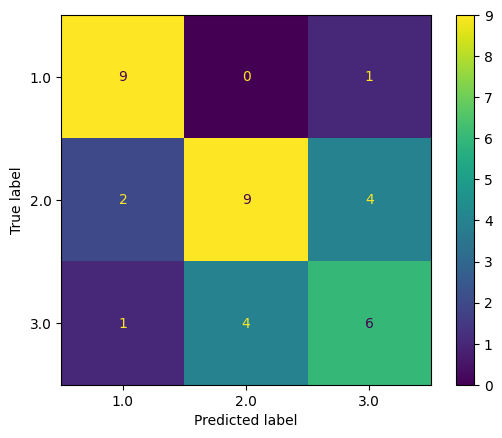

In [190]:

test_predictions = sv_regressor.predict(testing_dataset[:, :-1])
test_ground_truth = testing_dataset[:, -1]

cm = confusion_matrix(test_ground_truth, test_predictions, labels=ash_regressor.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=ash_regressor.classes_)
disp.plot()


In [191]:
score = accuracy_score(y_true=training_ground_truth, y_pred=training_predictions)
print(f"{score*100}%")

71.83098591549296%


In [ ]:
# an experiment using extra variables was made and it was discovered that only adding the squared features instead of the features
# itself might help the separation of features since squaring numbers helps to to spread them along the line, although this process might only
# be useful when the distibutions are compact and fairly different between wine classes because squaring the values of a feature also 
# spreads the distribution so if the distributions are not so compact and close to each other squaring might end up causing overlap, 
# this is perhaps one of the main failure reasons of the four variable classifier. 

# Logistic regression seems to perform the better when well-thought features are fed into it meaning that it is a good fit for classification
# jobs as long as a quality feature engineering work is done alongside.

# the best model obtained throughout this notebook was the two variable regressor but a better model could be developed with 
# well thought feature engineering